# Rating prediction project

importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

# CHECKING THE DATA ROWS AND COLUMNS

In [2]:
df=pd.read_csv("ratingproject.csv")

In [3]:
df

Unnamed: 0  Number of Stars           Short Review  \
0             0                1              Worthless   
1             1                4            Good choice   
2             2                3         Decent product   
3             3                3           Does the job   
4             4                5  Mind-blowing purchase   
..          ...              ...                    ...   
385         385                5  Mind-blowing purchase   
386         386                5         Simply awesome   
387         387                4             Delightful   
388         388                5              Brilliant   
389         389                5       Perfect product!   

                                           Full Review  
0    Battery good,camera quality not good\nPerforma...  
1    I am very happy to purchase this product and i...  
2                                            Very good  
3    -Camera 📸 quality is very poor...\n-Now days i...  
4                                         Nice product  
..                                                 ...  
385                                          Look nice  
386                                                Nic  
387                                               Good  
388                                               Good  
389                                               Good  

[390 rows x 4 columns]

In [4]:
df.columns

Index(['Unnamed: 0', 'Number of Stars', 'Short Review', 'Full Review'], dtype='object')

thare are 4 columns are there in which one is unwanted column

In [5]:
df.head()

Unnamed: 0  Number of Stars           Short Review  \
0           0                1              Worthless   
1           1                4            Good choice   
2           2                3         Decent product   
3           3                3           Does the job   
4           4                5  Mind-blowing purchase   

                                         Full Review  
0  Battery good,camera quality not good\nPerforma...  
1  I am very happy to purchase this product and i...  
2                                          Very good  
3  -Camera 📸 quality is very poor...\n-Now days i...  
4                                       Nice product

In [6]:
df.tail()

Unnamed: 0  Number of Stars           Short Review Full Review
385         385                5  Mind-blowing purchase   Look nice
386         386                5         Simply awesome         Nic
387         387                4             Delightful        Good
388         388                5              Brilliant        Good
389         389                5       Perfect product!        Good

In [7]:
df.dtypes

Unnamed: 0          int64
Number of Stars     int64
Short Review       object
Full Review        object
dtype: object

both int and object datatypes are present

In [8]:
df.isnull().sum()

Unnamed: 0         0
Number of Stars    0
Short Review       0
Full Review        0
dtype: int64

<AxesSubplot:>

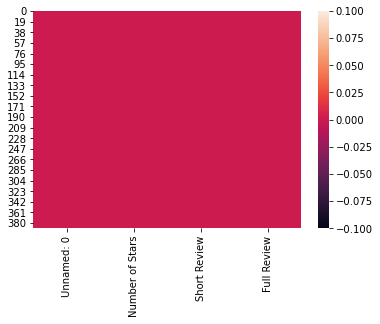

In [9]:
sns.heatmap(df.isnull())

heat map clearley shows that there is no null variable

# EDA:Analysing the target

In [10]:
df["Number of Stars"]

0      1
1      4
2      3
3      3
4      5
      ..
385    5
386    5
387    4
388    5
389    5
Name: Number of Stars, Length: 390, dtype: int64

here we have to use classification type algorithms to build model

5    178
1     78
4     68
3     45
2     21
Name: Number of Stars, dtype: int64


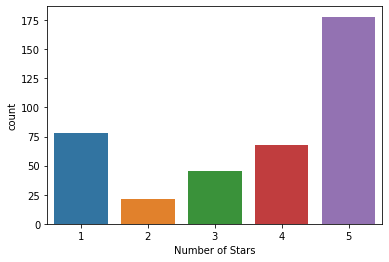

In [11]:
sns.countplot(df['Number of Stars'])
print(df["Number of Stars"].value_counts())

we have to do sampling to equalize the variables

# FEATURE COLUMNS:UNIVARIATE ANALYSIS

# Short Review

Wonderful                             22
Perfect product!                      20
Awesome                               16
Mind-blowing purchase                 16
Classy product                        15
Simply awesome                        15
Great product                         15
Super!                                14
Decent product                        13
Brilliant                             13
Utterly Disappointed                  13
Value-for-money                       12
Excellent                             11
Just wow!                             11
Nice                                  10
Horrible                               9
Good                                   8
Did not meet expectations              8
Terrific                               8
Does the job                           8
Useless product                        8
Worst experience ever!                 7
Terrible product                       6
Could be way better                    6
Worthless       

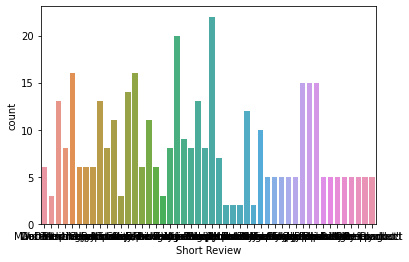

In [13]:
sns.countplot(df['Short Review'])
print(df["Short Review"].value_counts())

Good                                                                                                                    48
Best                                                                                                                    16
Good product                                                                                                            10
Nice product                                                                                                             9
Very good                                                                                                                8
                                                                                                                        ..
Overall nice product                                                                                                     2
Camera is 12.5 mp. Extra settings r not there . In this price range it's not sufficient. Overall not a good purchase     2
Gud at these pri

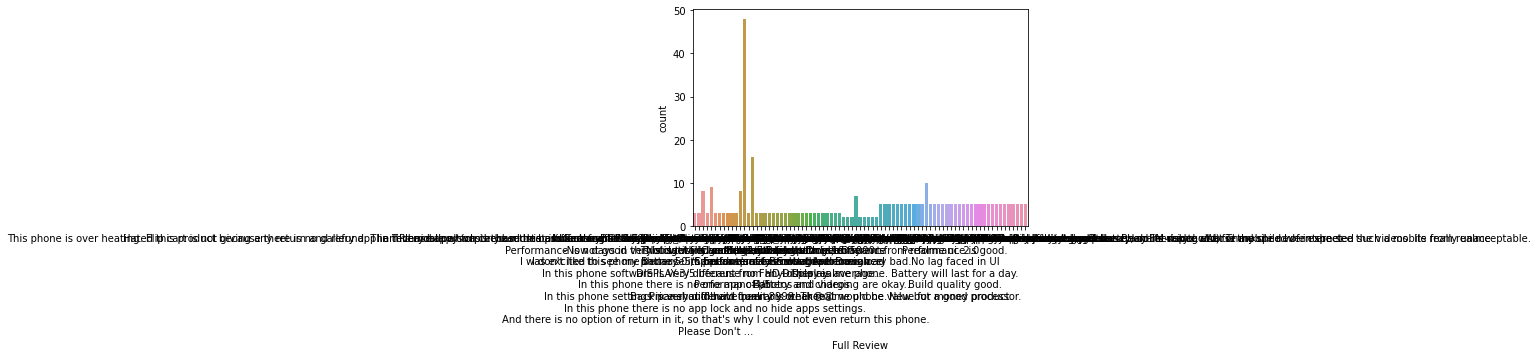

In [14]:
sns.countplot(df['Full Review'])
print(df["Full Review"].value_counts())

DROPPING UNWANTED COLUMN

In [17]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [18]:
df

Number of Stars           Short Review  \
0                  1              Worthless   
1                  4            Good choice   
2                  3         Decent product   
3                  3           Does the job   
4                  5  Mind-blowing purchase   
..               ...                    ...   
385                5  Mind-blowing purchase   
386                5         Simply awesome   
387                4             Delightful   
388                5              Brilliant   
389                5       Perfect product!   

                                           Full Review  
0    Battery good,camera quality not good\nPerforma...  
1    I am very happy to purchase this product and i...  
2                                            Very good  
3    -Camera 📸 quality is very poor...\n-Now days i...  
4                                         Nice product  
..                                                 ...  
385                                          Look nice  
386                                                Nic  
387                                               Good  
388                                               Good  
389                                               Good  

[390 rows x 3 columns]

# ENCODING

In [19]:
df.dtypes

Number of Stars     int64
Short Review       object
Full Review        object
dtype: object

OBJECT DTYPES ARE THERE IN DATASET

In [20]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [21]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [22]:
df

Number of Stars  Short Review  Full Review
0                  1          46.0          3.0
1                  4          18.0         30.0
2                  3           8.0         68.0
3                  3          11.0          0.0
4                  5          25.0         47.0
..               ...           ...          ...
385                5          25.0         37.0
386                5          31.0         40.0
387                4           9.0         18.0
388                5           4.0         18.0
389                5          29.0         18.0

[390 rows x 3 columns]

In [23]:
df.dtypes

Number of Stars      int64
Short Review       float64
Full Review        float64
dtype: object

# TREATING OUTLIERS

In [24]:
df.shape

(390, 3)

In [25]:
from scipy.stats import zscore

In [26]:
z=np.abs(zscore(df))

In [27]:
new_df=df[(z<3).all(axis=1)]

In [28]:
new_df.shape

(390, 3)

NO OUTLIERS ARE THERE IN THE DATA,,,SO NO LOSS

# CORRELATION AND HEATMAP

In [29]:
df.describe()

Number of Stars  Short Review  Full Review
count       390.000000    390.000000   390.000000
mean          3.633333     23.525641    37.925641
std           1.568133     13.899866    23.312278
min           1.000000      0.000000     0.000000
25%           2.000000     11.000000    18.000000
50%           4.000000     25.000000    36.000000
75%           5.000000     35.000000    58.000000
max           5.000000     47.000000    80.000000

In [30]:
cor=new_df.corr()

In [31]:
cor

Number of Stars  Short Review  Full Review
Number of Stars         1.000000     -0.202717    -0.127184
Short Review           -0.202717      1.000000     0.016797
Full Review            -0.127184      0.016797     1.000000

<AxesSubplot:>

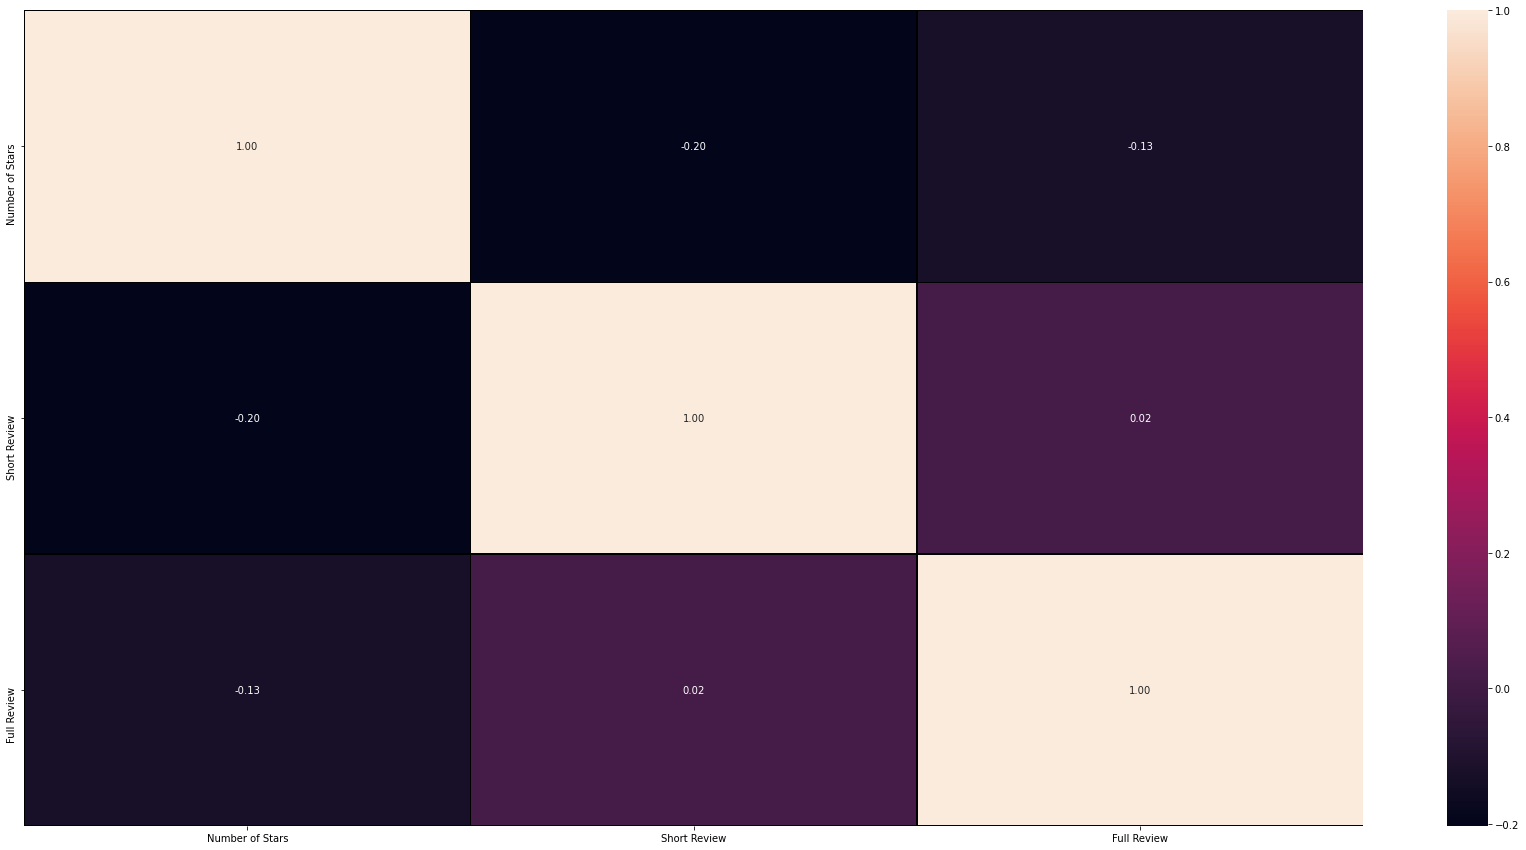

In [32]:
plt.figure(figsize=(30,15))
sns.heatmap(cor,annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

HEAT MAP CONVEYING THE CORRELATION OF COLUMNS

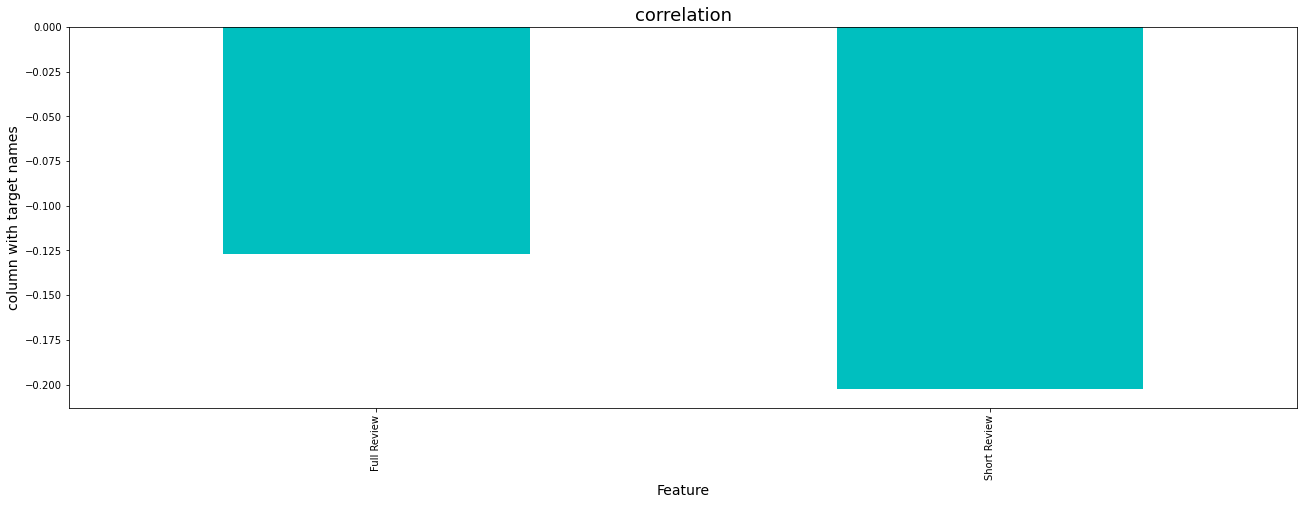

In [33]:
plt.figure(figsize=(22,7))
cor['Number of Stars'].sort_values(ascending=False).drop(['Number of Stars']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# SKEWNESS REMOVAL

In [34]:
new_df.skew()

Number of Stars   -0.716698
Short Review      -0.074184
Full Review        0.211140
dtype: float64

THERE IS NO MUCH SKEWNESS PRESENCE IN THE DATA SET

# SPLITTING X AND Y

In [35]:
x=new_df.drop("Number of Stars",axis=1)
y=new_df["Number of Stars"]

In [36]:
x

Short Review  Full Review
0            46.0          3.0
1            18.0         30.0
2             8.0         68.0
3            11.0          0.0
4            25.0         47.0
..            ...          ...
385          25.0         37.0
386          31.0         40.0
387           9.0         18.0
388           4.0         18.0
389          29.0         18.0

[390 rows x 2 columns]

In [37]:
x.shape

(390, 2)

In [38]:
y

0      1
1      4
2      3
3      3
4      5
      ..
385    5
386    5
387    4
388    5
389    5
Name: Number of Stars, Length: 390, dtype: int64

In [39]:
y.shape

(390,)

# SAMPLING TARGET

HERE PREFERING SMOTE OR OVERSAMPLING

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
sm=SMOTE()

In [42]:
x1,y1=sm.fit_resample(x,y)

In [43]:
y1

0      1
1      4
2      3
3      3
4      5
      ..
885    4
886    4
887    4
888    4
889    4
Name: Number of Stars, Length: 890, dtype: int64

In [44]:
y1.value_counts()

1    178
2    178
3    178
4    178
5    178
Name: Number of Stars, dtype: int64

# SCALING FEATURES

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
sc=StandardScaler()

In [47]:
x1=sc.fit_transform(x1)

In [48]:
x1

array([[ 1.64906525, -1.3109926 ],
       [-0.34785065, -0.16714371],
       [-1.0610349 ,  1.44271769],
       ...,
       [-0.61456667,  0.48141442],
       [-0.98971647, -0.67552099],
       [ 1.43510997, -0.42133235]])

# SPLITTING AND APPLYING ALGORITHMS

we have x1 y1 that we already splitted for sampling

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=15)

In [52]:
x_train.shape

(623, 2)

In [53]:
x_test.shape

(267, 2)

In [54]:
y_train.shape

(623,)

In [55]:
y_test.shape

(267,)

# DECISION TREE CLASSSIFIER

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dtc=DecisionTreeClassifier()

In [58]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
dtc.score(x_train,y_train)

1.0

In [60]:
preddtc=dtc.predict(x_test)

In [61]:
print(preddtc)

[5 2 5 2 3 4 5 4 5 3 3 5 5 4 5 3 2 4 2 4 3 5 1 2 4 1 3 4 3 3 2 2 1 1 5 2 3
 4 5 2 5 5 2 2 3 5 2 4 4 5 4 3 2 1 1 1 5 1 4 4 2 3 2 1 2 1 3 4 5 5 4 2 4 5
 2 4 5 4 5 5 3 3 1 2 1 1 2 4 1 1 2 3 4 5 4 2 4 5 1 4 4 3 3 5 1 5 1 1 2 4 3
 4 1 1 4 5 5 3 5 3 5 4 3 5 3 4 5 4 5 2 2 5 2 2 4 2 1 3 5 1 5 4 1 1 5 4 3 5
 5 1 1 3 1 4 3 3 3 2 4 2 4 4 1 1 2 2 5 2 3 4 3 3 2 3 1 3 4 3 1 2 2 1 1 3 1
 5 4 1 3 5 5 4 1 5 4 1 1 5 5 3 5 2 4 1 4 5 4 1 1 2 3 5 5 2 4 5 2 1 1 4 4 4
 4 5 1 2 1 3 4 1 1 5 4 4 4 1 4 2 2 2 3 3 3 2 5 5 4 3 1 3 4 2 3 3 4 5 2 5 4
 2 3 2 5 1 3 3 4]


# accuracy score ,confusion matrix,classification report

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [64]:
accdtc=classification_report(y_test,preddtc)

In [65]:
print(accdtc)

              precision    recall  f1-score   support

           1       0.96      0.96      0.96        51
           2       0.96      0.90      0.93        52
           3       0.98      0.89      0.93        55
           4       0.92      0.93      0.92        59
           5       0.88      1.00      0.93        50

    accuracy                           0.94       267
   macro avg       0.94      0.94      0.94       267
weighted avg       0.94      0.94      0.94       267



In [66]:
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc)) 

[[49  0  0  2  0]
 [ 0 47  1  0  4]
 [ 0  2 49  3  1]
 [ 2  0  0 55  2]
 [ 0  0  0  0 50]]
              precision    recall  f1-score   support

           1       0.96      0.96      0.96        51
           2       0.96      0.90      0.93        52
           3       0.98      0.89      0.93        55
           4       0.92      0.93      0.92        59
           5       0.88      1.00      0.93        50

    accuracy                           0.94       267
   macro avg       0.94      0.94      0.94       267
weighted avg       0.94      0.94      0.94       267



# K-NEAREST NEIGHBOR

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [68]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [69]:
predknn=knn.predict(x_test)

In [70]:
print(predknn)

[5 2 5 2 3 4 5 4 5 3 3 5 4 4 5 3 2 4 2 4 3 5 1 2 4 1 3 3 3 3 2 2 1 1 5 2 3
 4 3 2 4 4 2 2 3 5 2 4 4 5 4 3 2 1 1 1 5 1 4 1 2 3 2 1 2 1 3 4 5 5 4 2 4 3
 2 4 5 4 5 5 3 3 1 2 1 1 2 4 1 1 2 3 4 3 4 2 4 5 1 4 4 3 3 2 1 5 4 4 2 4 3
 4 1 1 4 5 2 3 5 3 4 3 3 5 3 4 5 4 5 2 2 5 2 2 4 2 1 3 2 1 5 4 1 1 5 4 3 5
 3 4 1 3 1 4 3 3 3 2 4 2 4 4 1 3 2 3 5 2 3 4 3 3 2 3 4 3 4 3 1 2 2 1 1 3 1
 5 4 1 3 5 5 4 4 5 4 1 1 5 5 3 5 2 4 1 4 5 4 1 3 2 3 5 5 2 4 5 2 1 1 4 4 3
 4 5 1 2 1 3 4 1 1 5 4 4 4 3 4 2 5 2 3 3 3 2 5 5 4 3 4 3 4 2 3 3 4 5 2 4 5
 2 3 2 3 1 3 3 3]


# accuracy score ,confusion matrix,classification report

In [71]:
accknn=classification_report(y_test,predknn)

In [72]:
print(accknn)

              precision    recall  f1-score   support

           1       1.00      0.84      0.91        51
           2       0.94      0.90      0.92        52
           3       0.84      0.96      0.90        55
           4       0.83      0.92      0.87        59
           5       0.87      0.80      0.83        50

    accuracy                           0.89       267
   macro avg       0.90      0.89      0.89       267
weighted avg       0.89      0.89      0.89       267



In [73]:
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

[[43  0  2  6  0]
 [ 0 47  2  0  3]
 [ 0  2 53  0  0]
 [ 0  0  2 54  3]
 [ 0  1  4  5 40]]
              precision    recall  f1-score   support

           1       1.00      0.84      0.91        51
           2       0.94      0.90      0.92        52
           3       0.84      0.96      0.90        55
           4       0.83      0.92      0.87        59
           5       0.87      0.80      0.83        50

    accuracy                           0.89       267
   macro avg       0.90      0.89      0.89       267
weighted avg       0.89      0.89      0.89       267



# SUPPORT VECTOR

In [74]:
from sklearn.svm import SVC

In [75]:
svc=SVC(probability=True)

In [76]:
svc.fit(x_train,y_train)

SVC(probability=True)

In [77]:
predsvc=svc.predict(x_test)

In [78]:
print(predsvc)

[3 5 2 2 3 2 2 4 1 2 2 3 3 4 3 3 2 1 2 1 2 1 1 2 1 4 3 3 3 3 5 5 1 3 1 2 3
 1 3 2 4 1 2 5 1 5 2 3 2 3 4 3 2 1 1 3 3 1 4 4 2 3 2 4 2 1 3 2 2 3 4 2 4 3
 2 4 3 1 1 3 3 3 1 2 4 1 2 4 1 1 2 3 3 3 4 5 3 3 1 3 2 3 3 5 3 1 1 4 2 5 3
 4 1 1 3 3 5 3 3 2 4 3 2 5 3 3 1 1 3 2 2 5 5 2 5 2 1 3 2 1 2 4 4 3 5 5 3 2
 3 1 3 3 4 4 3 3 3 2 1 5 4 1 4 3 2 2 5 2 3 3 3 3 2 3 4 3 1 3 4 5 5 1 1 3 4
 3 1 1 3 1 2 4 1 5 4 1 1 2 3 3 1 2 4 1 2 2 4 1 3 2 3 5 5 2 1 3 2 1 1 4 3 3
 2 3 1 5 3 3 4 4 1 3 1 4 4 3 3 2 2 2 3 3 3 2 4 2 3 3 4 1 2 2 3 3 4 1 5 3 3
 2 3 2 3 1 3 3 3]


# accuracy score ,confusion matrix,classification report

In [79]:
accsvc=classification_report(y_test,predsvc)

In [80]:
print(accsvc)

              precision    recall  f1-score   support

           1       0.54      0.57      0.55        51
           2       0.62      0.71      0.66        52
           3       0.51      0.84      0.63        55
           4       0.55      0.36      0.43        59
           5       0.29      0.14      0.19        50

    accuracy                           0.52       267
   macro avg       0.50      0.52      0.49       267
weighted avg       0.50      0.52      0.50       267



In [81]:
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

[[29  0  8 14  0]
 [ 0 37  1  0 14]
 [ 2  7 46  0  0]
 [13  7 15 21  3]
 [10  9 21  3  7]]
              precision    recall  f1-score   support

           1       0.54      0.57      0.55        51
           2       0.62      0.71      0.66        52
           3       0.51      0.84      0.63        55
           4       0.55      0.36      0.43        59
           5       0.29      0.14      0.19        50

    accuracy                           0.52       267
   macro avg       0.50      0.52      0.49       267
weighted avg       0.50      0.52      0.50       267



# RANDOMFOREST

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rfc=RandomForestClassifier()

In [84]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [85]:
predrfc=rfc.predict(x_test)

In [86]:
print(predrfc)

[5 2 5 2 3 4 5 4 5 3 3 5 5 4 5 3 2 4 2 4 3 5 1 2 4 1 3 3 3 3 2 2 1 1 5 2 3
 4 5 2 5 5 2 2 3 5 2 4 4 5 4 3 2 1 1 1 5 1 4 1 2 3 2 1 2 1 3 4 5 5 1 2 4 5
 2 4 5 4 5 5 3 3 1 2 1 1 2 4 1 1 2 3 4 5 4 2 4 5 1 4 4 3 3 2 1 5 1 1 2 4 3
 4 1 1 4 5 5 3 5 3 5 3 3 5 3 4 5 4 5 2 2 5 2 2 4 2 1 3 5 1 5 4 1 1 5 4 3 5
 5 4 1 3 1 4 3 3 3 2 4 2 4 4 1 1 2 2 5 2 3 4 3 3 2 3 1 3 4 3 1 2 2 1 1 3 1
 5 4 1 3 5 5 4 1 5 4 1 1 5 5 3 5 2 4 1 4 5 4 1 4 2 3 5 5 2 4 5 2 1 1 4 4 3
 4 5 1 2 1 3 4 1 1 5 4 4 4 1 4 2 2 2 3 3 3 2 5 5 4 3 1 3 4 2 3 3 4 5 2 5 4
 2 3 2 3 1 3 3 3]


# accuracy score ,confusion matrix,classification report

In [87]:
accrfc=classification_report(y_test,predrfc)

In [88]:
print(accrfc)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        51
           2       0.96      0.92      0.94        52
           3       0.96      0.96      0.96        55
           4       1.00      0.95      0.97        59
           5       0.91      1.00      0.95        50

    accuracy                           0.97       267
   macro avg       0.97      0.97      0.97       267
weighted avg       0.97      0.97      0.97       267



In [89]:
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

[[51  0  0  0  0]
 [ 0 48  1  0  3]
 [ 0  2 53  0  0]
 [ 0  0  1 56  2]
 [ 0  0  0  0 50]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        51
           2       0.96      0.92      0.94        52
           3       0.96      0.96      0.96        55
           4       1.00      0.95      0.97        59
           5       0.91      1.00      0.95        50

    accuracy                           0.97       267
   macro avg       0.97      0.97      0.97       267
weighted avg       0.97      0.97      0.97       267



# CROSS VALIDATION MEAN SCORE

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
print(cross_val_score(dtc,x1,y1,cv=5).mean())

0.9696629213483146


In [92]:
print(cross_val_score(knn,x1,y1,cv=5).mean())

0.9404494382022472


In [93]:
print(cross_val_score(svc,x1,y1,cv=5).mean())

0.6179775280898876


In [94]:
print(cross_val_score(rfc,x1,y1,cv=5).mean())

0.9741573033707865


HERE COMPARING ACCURACY AND CROSS VALIDATION MEAN PREFEREING RANDOM FOREST CLASSIFIIER FOR HYPERPARAMETER TUNING

# HYPER PARAMETRE TUNING:RANDOM FOREST CLASSIFIER

In [95]:
from sklearn.model_selection import GridSearchCV

In [106]:
parameter={'max_depth':np.arange(2,10),'criterion':['gini','entropy'],
          'max_features':['auto','sqrt','log2']}

In [107]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [108]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [109]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt'}

WE HAVE TO PASS THIS BEST PARAMETERS TO OUR MODEL

In [111]:
Rating_model=RandomForestClassifier(criterion='gini',
 max_depth=9,
 max_features='sqrt')

In [112]:
Rating_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, max_features='sqrt')

In [114]:
Bpred=Rating_model.predict(x_test)

In [115]:
Bacc=accuracy_score(y_test,Bpred)

In [116]:
print(Bacc)

0.9438202247191011


WE GOT 94% ACCURACY

# SAVING THE MODEL AND CONCLUSION

In [117]:
conclusion=pd.DataFrame([Rating_model.predict(x_test)[:],Bpred[:]],index=["Predicted","Orginal"])

In [118]:
conclusion

0    1    2    3    4    5    6    7    8    9    ...  257  258  \
Predicted    5    2    5    2    3    4    5    4    5    3  ...    5    5   
Orginal      5    2    5    2    3    4    5    4    5    3  ...    5    5   

           259  260  261  262  263  264  265  266  
Predicted    2    3    2    3    1    3    3    3  
Orginal      2    3    2    3    1    3    3    3  

[2 rows x 267 columns]

In [119]:
import joblib

In [120]:
joblib.dump(Rating_model,"Rating_model.pk1")

['Rating_model.pk1']